# K-PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading The dataset

In [2]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


**Checking for missing data from dataset:**

In [3]:
null_val = df.isnull().sum()
null_val

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

**Checking any duplicate data in dataset:**

In [4]:
df[df.duplicated()]

,x1,x2,x3,x4,x5,x6,x7


**Description of dataset:**

In [5]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


**Comparing features with one another:**

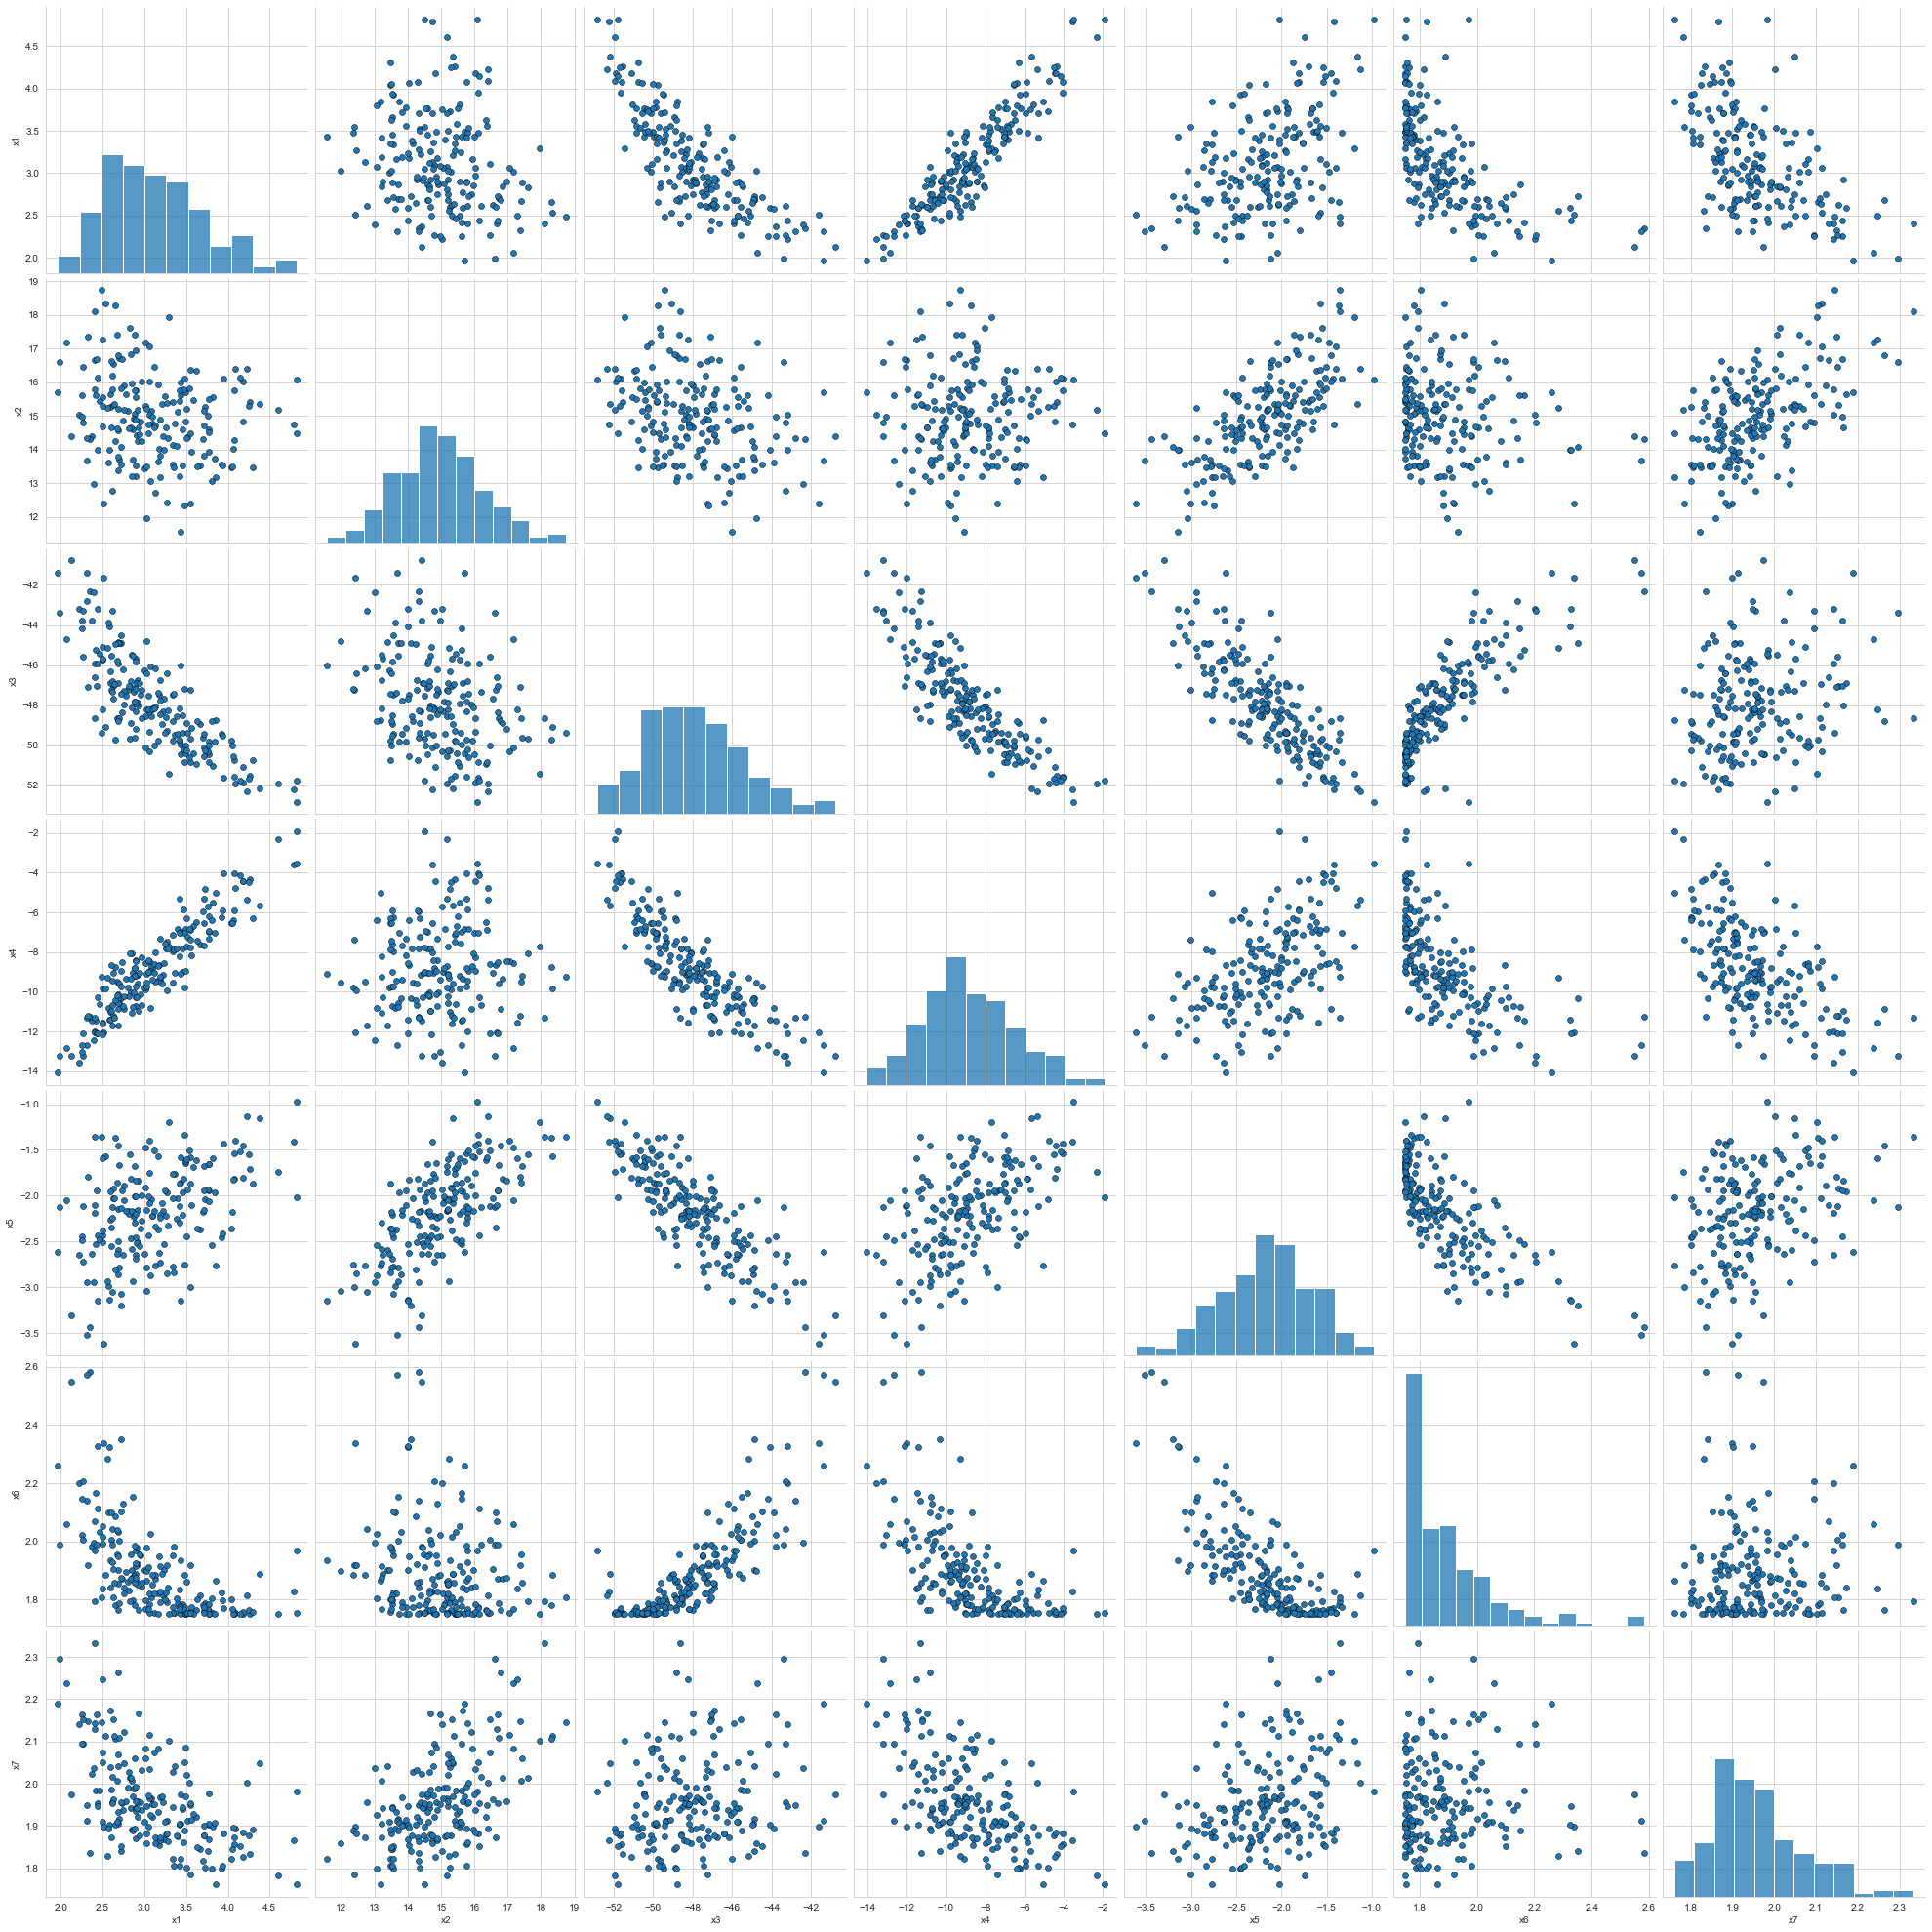

In [6]:
sns.set_style("whitegrid");
sns.pairplot(df, size=4, diag_kind = 'auto',plot_kws = {'edgecolor': 'k'});
plt.show()

**Standardize the dataset:**

In [7]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

# statistics of scaled data
df_scaled.describe()

,x1,x2,x3,x4,x5,x6,x7
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02
mean,4.861608e-16,1.334605e-15,-4.283124e-16,2.819382e-16,-3.587043e-16,-1.021990e-15,1.830115e-15
std,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00
min,-1.969901e+00,-2.631265e+00,-2.008924e+00,-2.255154e+00,-2.849651e+00,-9.040358e-01,-1.815341e+00
25%,-7.524304e-01,-6.934135e-01,-7.446873e-01,-6.781271e-01,-6.674832e-01,-7.552913e-01,-7.195187e-01
50%,-1.398125e-01,-3.264538e-02,-1.125178e-01,-1.005014e-01,3.838619e-02,-2.611607e-01,-1.470836e-01
75%,6.260622e-01,6.014429e-01,6.132157e-01,6.761279e-01,6.876498e-01,3.809776e-01,5.579842e-01
max,2.892812e+00,2.904366e+00,2.909625e+00,2.961942e+00,2.384287e+00,4.314800e+00,3.452963e+00


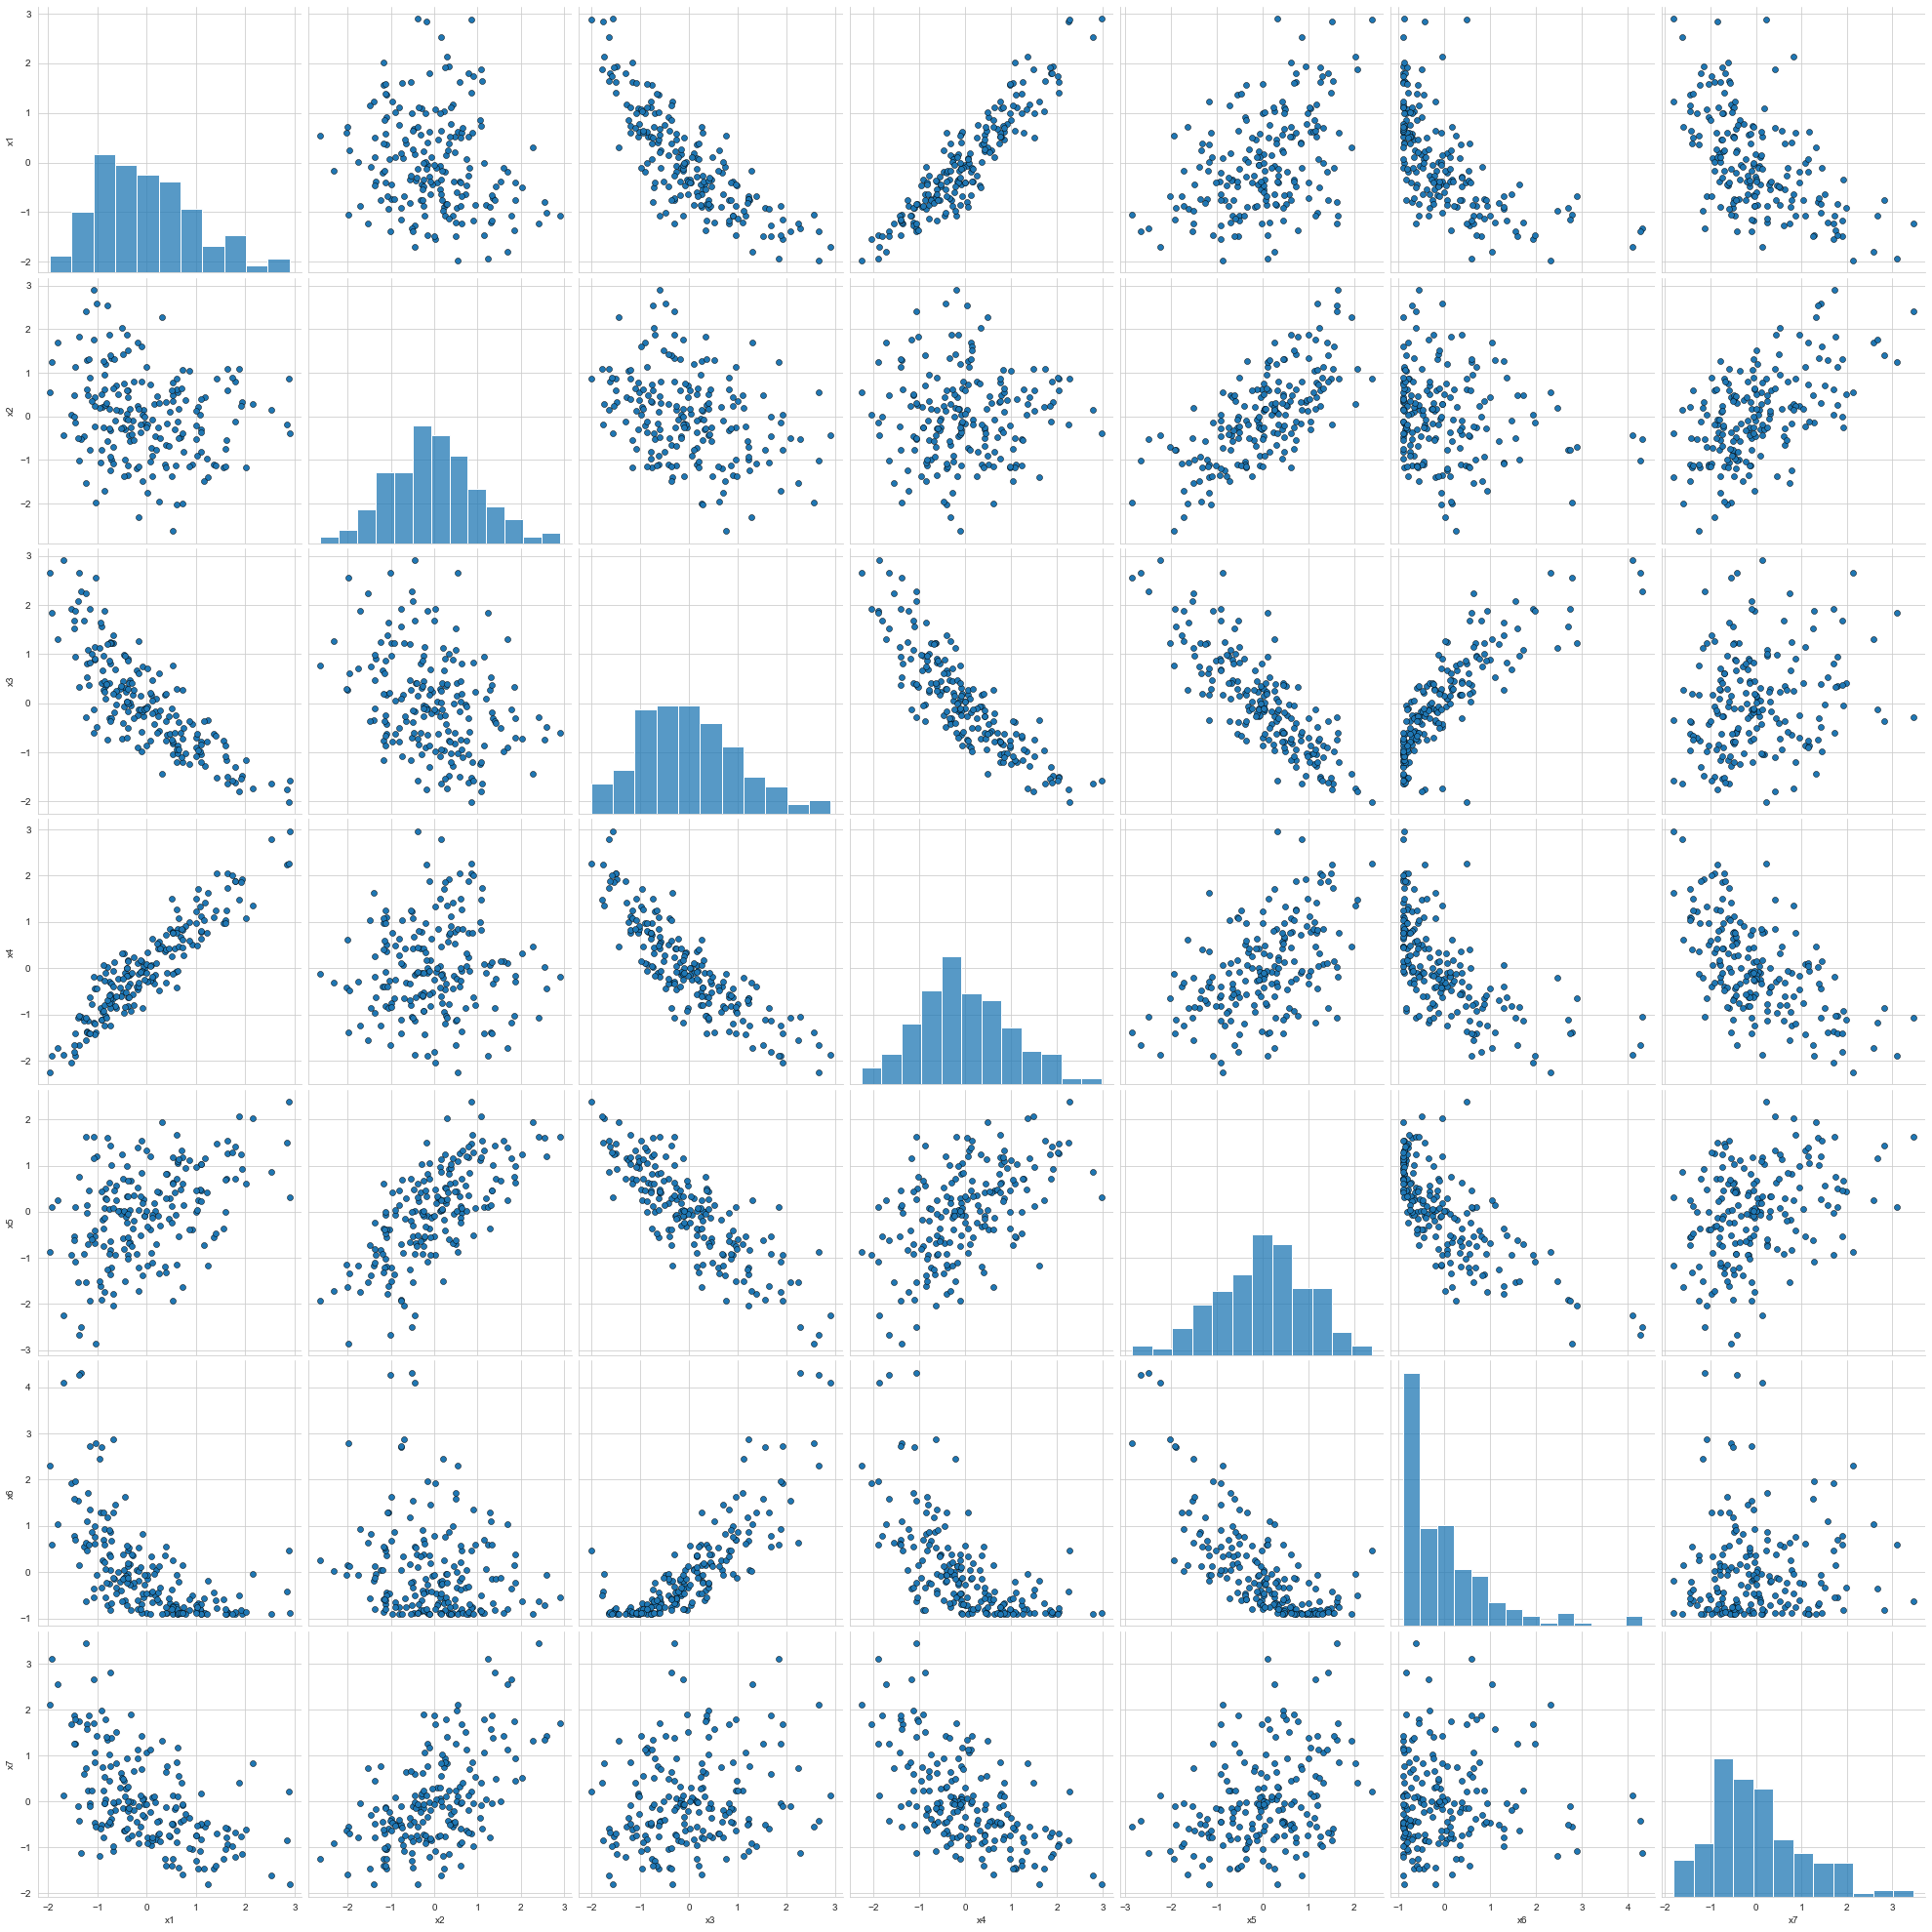

In [8]:
sns.set_style("whitegrid");
sns.pairplot(df_scaled, size=4, diag_kind = 'auto',plot_kws = {'edgecolor': 'k'});
plt.show()

### From the above maximum are not linearly separable. Lets use KPCA to reduce the dimensions 

**Now will Train KPCA. We will use rbf kernel for decomposition**

In [9]:
# https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

In [10]:
from sklearn.decomposition import KernelPCA

In [11]:
kpca = KernelPCA(n_components=10, kernel ='rbf', gamma = 15)
kpca_data = kpca.fit_transform(df_scaled.values)
kpca_df = pd.DataFrame(kpca_data)  #, columns=("Dimension-1","Dimension-2","Dimension-3"))

# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [12]:
kpca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.009425,-0.007548,-0.000495,-0.016472,-0.008352,-0.003039,-0.008314,-0.006281,-0.010866,-0.004487
1,-0.020085,-0.022172,-0.027216,0.084585,-0.009204,0.062095,0.020520,-0.052651,-0.030258,0.269201
2,-0.009530,-0.007641,-0.000502,-0.016711,-0.008513,-0.003105,-0.008498,-0.006428,-0.011141,-0.004615
3,-0.009622,-0.007722,-0.000508,-0.016918,-0.008656,-0.003164,-0.008662,-0.006559,-0.011387,-0.004732
4,0.018094,-0.004699,0.006278,-0.011927,-0.007400,-0.002736,-0.007486,-0.005675,-0.010122,-0.004147


## Plotting variance explained versus KPCA dimensions

In [13]:
expl_var_kpca = np.var(kpca_df, axis=0)
print('explained variance kpca: \n', expl_var_kpca)
expl_var_ratio_kpca = expl_var_kpca / np.sum(expl_var_kpca)
print('explained variance ratio kpca: \n', expl_var_ratio_kpca)

explained variance kpca: 
 0    0.009242
1    0.008893
2    0.008479
3    0.008352
4    0.007577
5    0.007337
6    0.007291
7    0.007183
8    0.007040
9    0.006834
dtype: float64
explained variance ratio kpca: 
 0    0.118135
1    0.113676
2    0.108390
3    0.106768
4    0.096859
5    0.093790
6    0.093204
7    0.091822
8    0.089993
9    0.087362
dtype: float64


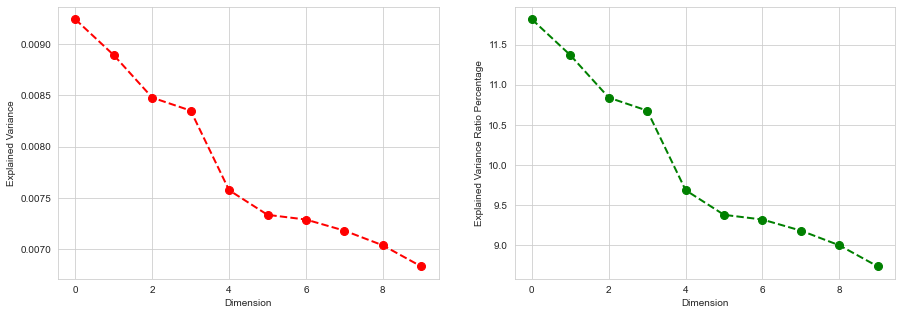

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(kpca_df.columns, expl_var_kpca, 'ro--', linewidth=2, markersize=8)
plt.xlabel("Dimension")
plt.ylabel("Explained Variance")
plt.subplot(122)
plt.plot(kpca_df.columns, expl_var_ratio_kpca*100, 'go--', linewidth=2, markersize=8)
plt.xlabel("Dimension")
plt.ylabel("Explained Variance Ratio Percentage")
plt.grid(True)
plt.show()

**Observation:**

1. From the above graph we see that as Dimension increases Variance Decreases
2. Only 11% variation can be explained by 1 Dimension

**References:**
1. https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance